In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
diabetes = pd.read_csv("C:/Users/rahem/OneDrive/Desktop/diabetes.csv")

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


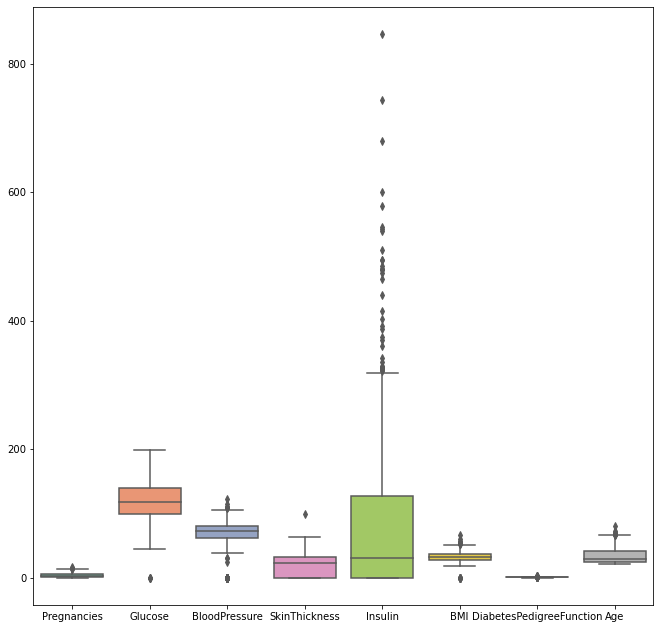

In [16]:
# Identifying outliers

non_categorical = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(11.11,11))
sns.boxplot(data=diabetes[non_categorical],  palette="Set2")
plt.show()

<AxesSubplot:>

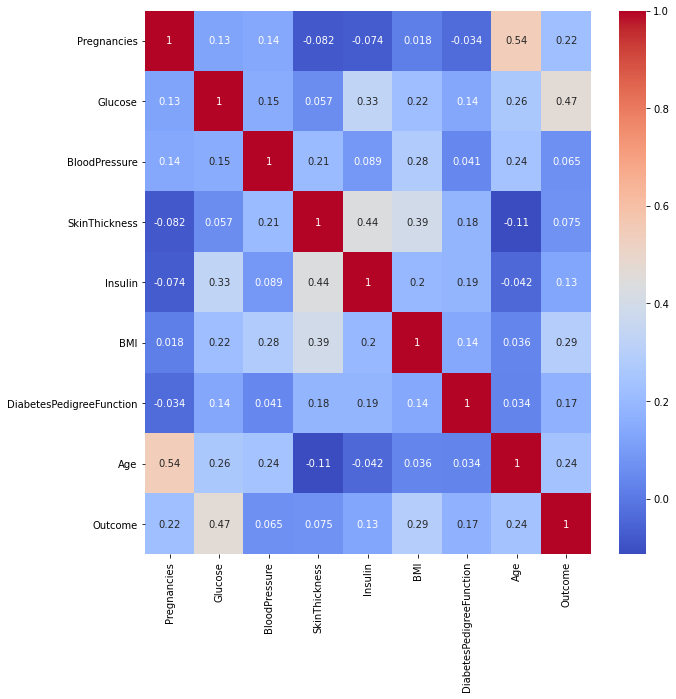

In [26]:
# Checking if there is any correlation between the varaibles

plt.figure(figsize=(10,10))
sns.heatmap(diabetes.corr(),annot=True,cmap='coolwarm')

In [28]:
# Forming X and Y variables

x = diabetes.drop(columns = ['Outcome'])
y = diabetes['Outcome']

In [29]:
# Normalising input varaibles
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values


In [31]:
# Splitting the dataset in training and test sets 

x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
# Save the datasets as csv files
x_train.to_csv('x_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

# Multilayer Perceptron Modelling

In [54]:
# import libraries
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
from joblib import dump
from joblib import load
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix

In [34]:
pip install skorch

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Collecting the dataset

x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')

# Convert dataframes to series
y_train = y_train.squeeze()

In [38]:
# Convert datasets into tensor
x_trainTensor = torch.tensor(x_train.to_numpy()).float()
y_trainTensor = torch.tensor(y_train.to_numpy()).long()

In [39]:
# Setting parameters
input_size = len(x_train.columns)
hidden_size = 200
output_size = 2

In [40]:
# Bulid a MLP model
class Net(nn.Module):
     def __init__(self, hidden_size=200, nonlin=F.relu):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.nonlin = nonlin
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
 
     def forward(self, x, **kwargs):
        hidden = self.nonlin(self.fc1(x))
        hidden = F.relu(self.fc2(hidden))
        out = F.softmax(self.fc3(hidden), dim=1)
        return out

net = NeuralNetClassifier(Net)

In [41]:
# Optimising the hyperparameters via grid search

params = {
    'lr': [0.05,0.1,0.2],
    'optimizer__momentum': [0.85,0.9,0.95],
    'module__hidden_size': [50,100,200],
}
gs = GridSearchCV(net, params, refit=True, cv=10,verbose=0)

start = time.time()

gs.fit(x_trainTensor, y_trainTensor)

end = time.time()

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6873       0.6392        0.6671  0.0570
      2        0.6559       0.6392        0.6635  0.0223
      3        0.6633       0.6392        0.6929  0.0180
      4        0.6925       0.6392        0.7047  0.0160
      5        0.6990       0.6392        0.6921  0.0150
      6        0.6854       0.6392        0.6767  0.0190
      7        0.6715       0.6392        0.6681  0.0160
      8        0.6641       0.6392        0.6653  0.0180
      9        0.6617       0.6392        0.6657  0.0190
     10        0.6623       0.6392        0.6673  0.0150
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7297       0.6392        0.6816  0.0130
      2        0.6631       0.6392        0.6643  0.0190
      3        0.6667       0.6392        0.7027  0.0150
      4        0.7038       0.6

      8        0.6579       0.6392        0.6543  0.0150
      9        0.6545       0.6392        0.6550  0.0140
     10        0.6557       0.6392        0.6588  0.0140
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7068       0.6392        0.6758  0.0090
      2        0.6599       0.6392        0.6640  0.0120
      3        0.6695       0.6392        0.7237  0.0130
      4        0.7288       0.6392        0.7381  0.0140
      5        0.7283       0.6392        0.6960  0.0170
      6        0.6866       0.6392        0.6637  0.0170
      7        0.6599       0.6392        0.6525  0.0110
      8        0.6506       0.6392        0.6514  0.0120
      9        0.6494       0.6392        0.6565  0.0110
     10        0.6540       0.6392        0.6636  0.0137
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6836       0.6

      5        0.7194       0.6392        0.6697  0.0160
      6        0.6635       0.6392        0.6496  0.0150
      7        0.6477       0.6392        0.6471  0.0160
      8        0.6445       0.6392        0.6543  0.0150
      9        0.6535       0.6392        0.6730  0.0150
     10        0.6720       0.6392        0.6864  0.0130
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6988       0.6392        0.6687  0.0140
      2        0.6570       0.6392        0.6839  0.0160
      3        0.6997       0.6392        0.7724  0.0150
      4        0.7753       0.6392        0.7533  0.0150
      5        0.7359       0.6392        0.6778  0.0170
      6        0.6706       0.6392        0.6484  0.0140
      7        0.6491       0.6392        0.6457  0.0150
      8        0.6458       0.6392        0.6475  0.0160
      9        0.6486       0.6392        0.6604  0.0150
     10        0.6635       0.6

      2        0.6565       0.6392        0.6699  0.0180
      3        0.6775       0.6392        0.7072  0.0190
      4        0.7107       0.6392        0.7020  0.0200
      5        0.6992       0.6392        0.6785  0.0180
      6        0.6768       0.6392        0.6647  0.0160
      7        0.6649       0.6392        0.6601  0.0160
      8        0.6611       0.6392        0.6602  0.0150
      9        0.6616       0.6392        0.6618  0.0170
     10        0.6634       0.6392        0.6626  0.0170
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6783       0.6392        0.6631  0.0140
      2        0.6552       0.6392        0.6767  0.0180
      3        0.6817       0.6392        0.7094  0.0160
      4        0.7083       0.6392        0.6968  0.0170
      5        0.6913       0.6392        0.6703  0.0167
      6        0.6675       0.6392        0.6560  0.0160
      7        0.6556       0.6

     10        0.6514       0.6392        0.6499  0.0140
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6820       0.6392        0.6634  0.0120
      2        0.6567       0.6392        0.6909  0.0190
      3        0.7013       0.6392        0.7332  0.0160
      4        0.7312       0.6392        0.7034  0.0160
      5        0.6965       0.6392        0.6673  0.0170
      6        0.6655       0.6392        0.6541  0.0160
      7        0.6544       0.6392        0.6517  0.0150
      8        0.6529       0.6392        0.6546  0.0150
      9        0.6574       0.6392        0.6596  0.0140
     10        0.6625       0.6392        0.6576  0.0150
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6768       0.6392        0.6586  0.0140
      2        0.6531       0.6392        0.6818  0.0160
      3        0.6954       0.6

      7        0.6456       0.6392        0.6503  0.0187
      8        0.6555       0.6392        0.6759  0.0210
      9        0.6832       0.6392        0.6831  0.0226
     10        0.6824       0.6392        0.6489  0.0210
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7050       0.6392        0.6610  0.0140
      2        0.6598       0.6392        0.7417  0.0180
      3        0.7705       0.6392        0.7729  0.0170
      4        0.7596       0.6392        0.6723  0.0180
      5        0.6701       0.6392        0.6467  0.0150
      6        0.6498       0.6392        0.6470  0.0170
      7        0.6482       0.6392        0.6524  0.0180
      8        0.6570       0.6392        0.6749  0.0160
      9        0.6817       0.6392        0.6888  0.0170
     10        0.6897       0.6392        0.6659  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  --------

      3        0.7408       0.6392        0.6934  0.0210
      4        0.6914       0.6392        0.6529  0.0180
      5        0.6580       0.6392        0.6472  0.0200
      6        0.6543       0.6392        0.6541  0.0200
      7        0.6644       0.6392        0.6559  0.0210
      8        0.6649       0.6392        0.6409  0.0207
      9        0.6506       0.6392        0.6280  0.0210
     10        0.6404       0.6392        0.6221  0.0180
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7099       0.6392        0.6622  0.0180
      2        0.6719       0.6392        0.7374  0.0300
      3        0.7476       0.6392        0.7036  0.0170
      4        0.6970       0.6392        0.6537  0.0180
      5        0.6570       0.6392        0.6423  0.0160
      6        0.6488       0.6392        0.6430  0.0200
      7        0.6528       0.6392        0.6424  0.0210
      8        0.6517       0.6

      5        0.6591       0.6392        0.6365  0.0244
      6        0.6423       0.6392        0.6312  0.0350
      7        0.6412       0.6392        0.6370  0.0190
      8        0.6494       0.6392        0.6201  0.0340
      9        0.6323       0.6392        0.5895  0.0219
     10        0.6082       0.6804        0.5721  0.0190
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6818       0.6392        0.6611  0.0200
      2        0.6658       0.6392        0.7198  0.0220
      3        0.7378       0.6392        0.7183  0.0207
      4        0.7120       0.6392        0.6633  0.0337
      5        0.6623       0.6392        0.6466  0.0200
      6        0.6481       0.6392        0.6443  0.0272
      7        0.6477       0.6392        0.6515  0.0290
      8        0.6559       0.6392        0.6499  0.0260
      9        0.6499       0.6392        0.6274  0.0280
     10        0.6285       0.6

      6        0.6397       0.6392        0.6344  0.0219
      7        0.6383       0.6392        0.6532  0.0190
      8        0.6621       0.6392        0.6555  0.0190
      9        0.6530       0.6392        0.5954  0.0180
     10        0.6009       0.7010        0.5606  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6839       0.6392        0.6641  0.0140
      2        0.6687       0.6392        0.7321  0.0160
      3        0.7533       0.6392        0.7388  0.0190
      4        0.7252       0.6392        0.6576  0.0170
      5        0.6568       0.6392        0.6398  0.0190
      6        0.6431       0.6392        0.6350  0.0177
      7        0.6419       0.6392        0.6532  0.0220
      8        0.6653       0.6392        0.6534  0.0180
      9        0.6535       0.6392        0.5988  0.0170
     10        0.6109       0.7113        0.5721  0.0180
  epoch    train_loss    valid_

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6651       0.6392        0.6525  0.0150
      2        0.6639       0.6392        0.7119  0.0180
      3        0.7218       0.6392        0.6901  0.0130
      4        0.6858       0.6392        0.6514  0.0160
      5        0.6525       0.6392        0.6435  0.0150
      6        0.6470       0.6392        0.6493  0.0149
      7        0.6538       0.6392        0.6487  0.0140
      8        0.6493       0.6392        0.6296  0.0149
      9        0.6303       0.6392        0.6130  0.0140
     10        0.6170       0.6392        0.6042  0.0140
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6911       0.6392        0.6598  0.0130
      2        0.6635       0.6392        0.7148  0.0150
      3        0.7289       0.6392        0.7122  0.0170
      4        0.7064       0.6

      6        0.6534       0.6392        0.6508  0.0140
      7        0.6556       0.6392        0.6599  0.0150
      8        0.6658       0.6392        0.6629  0.0210
      9        0.6660       0.6392        0.6474  0.0160
     10        0.6506       0.6392        0.6311  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6895       0.6392        0.6508  0.0150
      2        0.6555       0.6392        0.7211  0.0180
      3        0.7416       0.6392        0.7178  0.0160
      4        0.7064       0.6392        0.6520  0.0160
      5        0.6520       0.6392        0.6388  0.0170
      6        0.6408       0.6392        0.6366  0.0170
      7        0.6443       0.6392        0.6416  0.0160
      8        0.6436       0.6392        0.5927  0.0150
      9        0.5993       0.7320        0.5596  0.0167
     10        0.5785       0.7423        0.5402  0.0170
  epoch    train_loss    valid_

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6928       0.6392        0.6546  0.0180
      2        0.6595       0.6392        0.7391  0.0160
      3        0.7702       0.6392        0.7751  0.0150
      4        0.7645       0.6392        0.6911  0.0170
      5        0.6850       0.6392        0.6589  0.0180
      6        0.6605       0.6392        0.6561  0.0150
      7        0.6579       0.6392        0.6602  0.0170
      8        0.6642       0.6392        0.6740  0.0150
      9        0.6800       0.6392        0.6880  0.0200
     10        0.6921       0.6392        0.6861  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6969       0.6392        0.6595  0.0130
      2        0.6647       0.6392        0.7492  0.0110
      3        0.7707       0.6392        0.7626  0.0150
      4        0.7423       0.6

      3        0.7343       0.6392        0.6791  0.0200
      4        0.6734       0.6392        0.6432  0.0170
      5        0.6465       0.6392        0.6413  0.0170
      6        0.6483       0.6392        0.6498  0.0190
      7        0.6550       0.6392        0.6316  0.0180
      8        0.6356       0.6392        0.6105  0.0170
      9        0.6190       0.6392        0.6009  0.0177
     10        0.6103       0.6598        0.5720  0.0150
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6886       0.6392        0.6621  0.0200
      2        0.6783       0.6392        0.7381  0.0170
      3        0.7353       0.6392        0.6753  0.0180
      4        0.6673       0.6392        0.6414  0.0220
      5        0.6411       0.6392        0.6381  0.0170
      6        0.6420       0.6392        0.6435  0.0180
      7        0.6454       0.6392        0.6237  0.0160
      8        0.6208       0.6

      3        0.7627       0.6392        0.6840  0.0139
      4        0.6772       0.6392        0.6460  0.0293
      5        0.6483       0.6392        0.6435  0.0170
      6        0.6480       0.6392        0.6553  0.0150
      7        0.6627       0.6392        0.6541  0.0150
      8        0.6540       0.6392        0.6159  0.0170
      9        0.6182       0.6495        0.5887  0.0150
     10        0.5971       0.6495        0.5711  0.0170
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6877       0.6392        0.6554  0.0120
      2        0.6691       0.6392        0.7444  0.0130
      3        0.7477       0.6392        0.6835  0.0140
      4        0.6693       0.6392        0.6360  0.0160
      5        0.6325       0.6392        0.6298  0.0160
      6        0.6296       0.6392        0.6423  0.0150
      7        0.6402       0.6392        0.6147  0.0211
      8        0.5993       0.6

      5        0.6466       0.6392        0.6475  0.0170
      6        0.6531       0.6392        0.6708  0.0150
      7        0.6802       0.6392        0.6696  0.0160
      8        0.6652       0.6392        0.6140  0.0150
      9        0.6141       0.6598        0.5755  0.0150
     10        0.5855       0.6804        0.5590  0.0170
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6690       0.6392        0.6604  0.0120
      2        0.6773       0.6392        0.7435  0.0150
      3        0.7498       0.6392        0.6859  0.0148
      4        0.6752       0.6392        0.6398  0.0170
      5        0.6407       0.6392        0.6361  0.0160
      6        0.6406       0.6392        0.6464  0.0170
      7        0.6555       0.6392        0.6189  0.0150
      8        0.6147       0.6804        0.5568  0.0170
      9        0.5632       0.6804        0.5378  0.0160
     10        0.5600       0.7

      3        0.7235       0.6392        0.6558  0.0300
      4        0.6552       0.6392        0.6364  0.0240
      5        0.6399       0.6392        0.6421  0.0330
      6        0.6469       0.6392        0.6199  0.0330
      7        0.6203       0.6392        0.5890  0.0250
      8        0.5947       0.6804        0.5707  0.0299
      9        0.5733       0.7320        0.5290  0.0270
     10        0.5384       0.7320        0.5085  0.0210
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6875       0.6392        0.6882  0.0260
      2        0.7223       0.6392        0.7217  0.0250
      3        0.7036       0.6392        0.6499  0.0260
      4        0.6488       0.6392        0.6448  0.0380
      5        0.6496       0.6392        0.6569  0.0250
      6        0.6583       0.6392        0.6324  0.0240
      7        0.6304       0.6392        0.6108  0.0300
      8        0.6132       0.6

      2        0.7235       0.6392        0.7389  0.0490
      3        0.7197       0.6392        0.6430  0.0310
      4        0.6442       0.6392        0.6352  0.0300
      5        0.6417       0.6392        0.6634  0.0200
      6        0.6628       0.6392        0.6108  0.0230
      7        0.6122       0.6495        0.5793  0.0170
      8        0.5910       0.7320        0.5411  0.0200
      9        0.5532       0.7423        0.5028  0.0210
     10        0.5264       0.7629        0.4653  0.0190
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6763       0.6392        0.7004  0.0170
      2        0.7360       0.6392        0.7177  0.0187
      3        0.6869       0.6392        0.6295  0.0210
      4        0.6257       0.6392        0.6261  0.0230
      5        0.6329       0.6392        0.6337  0.0190
      6        0.6141       0.6907        0.5570  0.0190
      7        0.5581       0.6

     10        0.5626       0.7113        0.5535  0.0470
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6827       0.6392        0.6672  0.0310
      2        0.6991       0.6392        0.7752  0.0330
      3        0.7593       0.6392        0.6561  0.0279
      4        0.6543       0.6392        0.6443  0.0220
      5        0.6454       0.6392        0.6529  0.0249
      6        0.6575       0.6392        0.6434  0.0300
      7        0.6342       0.7010        0.5822  0.0240
      8        0.5857       0.6701        0.5766  0.0230
      9        0.5799       0.7732        0.5011  0.0230
     10        0.5299       0.7423        0.4822  0.0270
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6739       0.6392        0.6895  0.0220
      2        0.7383       0.6392        0.7326  0.0258
      3        0.6993       0.6

     10        0.6268       0.6392        0.5969  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7057       0.6392        0.6806  0.0200
      2        0.7255       0.6392        0.7422  0.0200
      3        0.7255       0.6392        0.6609  0.0190
      4        0.6618       0.6392        0.6583  0.0190
      5        0.6626       0.6392        0.6730  0.0230
      6        0.6782       0.6392        0.6802  0.0190
      7        0.6811       0.6392        0.6681  0.0270
      8        0.6680       0.6392        0.6568  0.0190
      9        0.6582       0.6392        0.6540  0.0230
     10        0.6545       0.6392        0.6395  0.0210
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6988       0.6392        0.6590  0.0170
      2        0.6790       0.6392        0.7487  0.0200
      3        0.7469       0.6

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6800       0.6392        0.6840  0.0170
      2        0.7220       0.6392        0.7424  0.0350
      3        0.7247       0.6392        0.6542  0.0320
      4        0.6559       0.6392        0.6480  0.0328
      5        0.6533       0.6392        0.6623  0.0310
      6        0.6692       0.6392        0.6459  0.0230
      7        0.6433       0.6392        0.5913  0.0220
      8        0.5990       0.6701        0.5632  0.0300
      9        0.5786       0.7732        0.4937  0.0310
     10        0.5414       0.7423        0.4929  0.0320
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6929       0.6392        0.6867  0.0190
      2        0.7309       0.6392        0.7674  0.0230
      3        0.7400       0.6392        0.6665  0.0300
      4        0.6636       0.6

      2        0.7157       0.6392        0.8166  0.0140
      3        0.7990       0.6392        0.6893  0.0200
      4        0.6819       0.6392        0.6582  0.0240
      5        0.6585       0.6392        0.6553  0.0180
      6        0.6593       0.6392        0.6658  0.0200
      7        0.6637       0.6392        0.6315  0.0170
      8        0.6279       0.6495        0.5922  0.0180
      9        0.5962       0.6804        0.5531  0.0180
     10        0.5607       0.7732        0.4831  0.0227
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6789       0.6392        0.6810  0.0150
      2        0.7345       0.6392        0.7491  0.0220
      3        0.7238       0.6392        0.6519  0.0210
      4        0.6517       0.6392        0.6518  0.0200
      5        0.6541       0.6392        0.6647  0.0220
      6        0.6636       0.6392        0.6395  0.0230
      7        0.6269       0.6

      2        0.7377       0.6392        0.7012  0.0170
      3        0.6888       0.6392        0.6515  0.0160
      4        0.6538       0.6392        0.6624  0.0160
      5        0.6690       0.6392        0.6673  0.0180
      6        0.6627       0.6392        0.6299  0.0140
      7        0.6303       0.6392        0.6220  0.0130
      8        0.6149       0.6907        0.5624  0.0130
      9        0.5752       0.7526        0.5245  0.0130
     10        0.5462       0.7423        0.5281  0.0130
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6672       0.6392        0.6805  0.0130
      2        0.7065       0.6392        0.7033  0.0160
      3        0.6893       0.6392        0.6461  0.0150
      4        0.6444       0.6392        0.6474  0.0160
      5        0.6498       0.6392        0.6417  0.0150
      6        0.6298       0.6392        0.5931  0.0160
      7        0.5879       0.6

      2        0.7402       0.6392        0.7104  0.0170
      3        0.6914       0.6392        0.6454  0.0260
      4        0.6460       0.6392        0.6550  0.0210
      5        0.6610       0.6392        0.6623  0.0140
      6        0.6494       0.6392        0.5947  0.0140
      7        0.5948       0.6495        0.5863  0.0160
      8        0.5815       0.7320        0.5177  0.0170
      9        0.5506       0.7010        0.5181  0.0150
     10        0.5382       0.7010        0.7334  0.0160
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6624       0.6392        0.6778  0.0130
      2        0.7104       0.6392        0.7131  0.0170
      3        0.6922       0.6392        0.6405  0.0140
      4        0.6372       0.6392        0.6448  0.0150
      5        0.6493       0.6392        0.6491  0.0170
      6        0.6279       0.6701        0.5833  0.0193
      7        0.5833       0.6

      2        0.7507       0.6392        0.7260  0.0150
      3        0.7022       0.6392        0.6483  0.0160
      4        0.6486       0.6392        0.6548  0.0140
      5        0.6619       0.6392        0.6768  0.0180
      6        0.6655       0.6804        0.5879  0.0160
      7        0.5878       0.6907        0.5799  0.0140
      8        0.5892       0.7629        0.4739  0.0177
      9        0.5405       0.7835        0.4597  0.0150
     10        0.5231       0.7113        0.6533  0.0150
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6892       0.6392        0.7552  0.0110
      2        0.8086       0.6392        0.6824  0.0140
      3        0.6685       0.6392        0.6531  0.0150
      4        0.6569       0.6392        0.6736  0.0160
      5        0.6779       0.6392        0.6578  0.0150
      6        0.6455       0.6392        0.6010  0.0130
      7        0.5969       0.6

      2        0.7777       0.6392        0.6436  0.0180
      3        0.6439       0.6392        0.6505  0.0200
      4        0.6608       0.6392        0.6521  0.0200
      5        0.6407       0.6392        0.5911  0.0180
      6        0.6020       0.6804        0.5520  0.0254
      7        0.5704       0.7216        0.5529  0.0190
      8        0.5723       0.6907        0.6832  0.0230
      9        0.6066       0.6701        0.6528  0.0220
     10        0.6030       0.7835        0.4854  0.0220
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6886       0.6392        0.7987  0.0180
      2        0.7923       0.6392        0.6517  0.0230
      3        0.6508       0.6392        0.6535  0.0180
      4        0.6609       0.6392        0.6767  0.0200
      5        0.6732       0.6392        0.6381  0.0210
      6        0.6309       0.6392        0.6167  0.0200
      7        0.6163       0.6

      2        0.8022       0.6392        0.6426  0.0270
      3        0.6450       0.6392        0.6470  0.0280
      4        0.6607       0.6392        0.6682  0.0260
      5        0.6564       0.6701        0.5793  0.0220
      6        0.5935       0.7113        0.5619  0.0250
      7        0.5796       0.7320        0.5384  0.0230
      8        0.5653       0.7113        0.7040  0.0208
      9        0.6408       0.6598        0.8115  0.0240
     10        0.6635       0.8144        0.5256  0.0260
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6722       0.6392        0.8139  0.0210
      2        0.7988       0.6392        0.6380  0.0230
      3        0.6376       0.6392        0.6434  0.0370
      4        0.6549       0.6392        0.6651  0.0133
      5        0.6411       0.6804        0.5662  0.0347
      6        0.5642       0.6907        0.5601  0.0247
      7        0.5427       0.7

      3        0.6485       0.6392        0.6666  0.0220
      4        0.6775       0.6392        0.6851  0.0220
      5        0.6728       0.6392        0.6062  0.0240
      6        0.6061       0.6392        0.6012  0.0190
      7        0.6091       0.7423        0.4855  0.0220
      8        0.5627       0.7835        0.4655  0.0190
      9        0.5675       0.8351        0.4559  0.0230
     10        0.5374       0.7423        0.4774  0.0200
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6691       0.6392        0.7946  0.0160
      2        0.7975       0.6392        0.6411  0.0210
      3        0.6411       0.6392        0.6563  0.0190
      4        0.6693       0.6392        0.6844  0.0200
      5        0.6625       0.6598        0.5943  0.0800
      6        0.5855       0.6598        0.6034  0.0410
      7        0.5792       0.7216        0.5173  0.0250
      8        0.5709       0.7

In [42]:

print(f"Runtime of the program is {end - start}")

Runtime of the program is 61.42744064331055


In [43]:
# See the best score and the parameters
print(gs.best_score_, gs.best_params_)

0.7446890286512928 {'lr': 0.1, 'module__hidden_size': 200, 'optimizer__momentum': 0.9}


In [44]:
# See the score of the best model on the train set
gs.score(x_trainTensor,y_trainTensor)

0.7579143389199255

In [45]:
# Save the optimised model as a file
dump(gs, 'MLP_optimised.joblib')

['MLP_optimised.joblib']

In [46]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_lr','param_optimizer__momentum','param_module__hidden_size','mean_test_score']]
results.columns = ['lr','momentum','hidden_size','score']
results

,lr,momentum,hidden_size,score
0,0.05,0.85,50,0.638749
1,0.05,0.9,50,0.638749
2,0.05,0.95,50,0.638749
3,0.05,0.85,100,0.638749
4,0.05,0.9,100,0.640636
5,0.05,0.95,100,0.644444
6,0.05,0.85,200,0.640636
7,0.05,0.9,200,0.655486
8,0.05,0.95,200,0.688924
9,0.1,0.85,50,0.642523


# Testing Set

In [55]:
# import files
mlp = load('MLP_optimised.joblib')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Convert dataframes to series and then to tensor
y_test = y_test.squeeze()
x_testTensor = torch.tensor(x_test.to_numpy()).float()
y_testTensor = torch.tensor(y_test.to_numpy()).long()

In [56]:
# See the score of the best model on the test set
mlp.score(x_testTensor,y_testTensor)

0.7402597402597403

C:\Users\rahem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


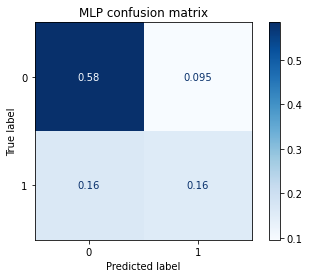

In [57]:
# Plot normalized confusion matrix
disp = plot_confusion_matrix(mlp, x_testTensor, y_testTensor, cmap=plt.cm.Blues, normalize='all')
disp.ax_.set_title('MLP confusion matrix')
plt.show()

In [58]:

# See precision, recall and F1 score
precision,recall,f,support = precision_recall_fscore_support(y_testTensor, mlp.predict(x_testTensor))
print('precision',precision,'\nrecall',recall,'\nF1',f,'\nsupport',support)

precision [0.78034682 0.62068966] 
recall [0.85987261 0.48648649] 
F1 [0.81818182 0.54545455] 
support [157  74]


C:\Users\rahem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


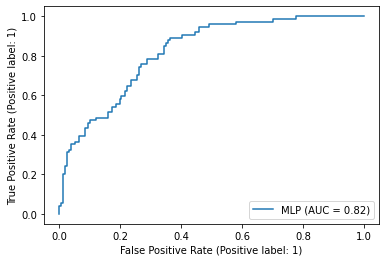

In [59]:
# Visualise ROC curve
metrics.plot_roc_curve(mlp, x_testTensor, y_testTensor, name='MLP')
plt.show()